# Part C – A* Search Programming Task

This notebook implements A* search on a 2D maze, tests three heuristic cases,  
and records the path, cost, and optimality for each.

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Maze: 1 = wall, 0 = free cell, 'A' = start, 'B' = goal
maze = [
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    ['A', 0, 0, 0, 'B'],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

rows, cols = len(maze), len(maze[0])

for i in range(rows):
    for j in range(cols):
        if maze[i][j] == 'A':
            start = (i, j)
            maze[i][j] = 0
        if maze[i][j] == 'B':
            goal = (i, j)
            maze[i][j] = 0

In [3]:
def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def manhattan_1_5(a, b):
    # Multiplied by 1.5: may overestimate → inadmissible
    return 1.5 * manhattan(a, b)

def inconsistent(a, b):
    # Mostly Manhattan, but deliberately break consistency for one cell
    if a == (2,1):
        return 10
    return manhattan(a, b)

In [4]:
def astar(maze, start, goal, heuristic):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g = {start: 0}

    while open_set:
        f, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g[goal]

        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            nx, ny = current[0]+dx, current[1]+dy
            neighbor = (nx, ny)
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                tentative_g = g[current] + 1
                if neighbor not in g or tentative_g < g[neighbor]:
                    g[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f, neighbor))
                    came_from[neighbor] = current
    return None, float("inf")

In [5]:
def show_path(path):
    grid = np.array(maze, dtype=int)
    for (x,y) in path:
        grid[x][y] = 2
    plt.imshow(grid, cmap="coolwarm")
    plt.title("Path (red=path, blue=walls)")
    plt.show()

## Case 1 – Manhattan Distance (Admissible & Consistent)

Manhattan distance never overestimates the true path cost in a 4-direction grid  
and satisfies consistency. A* should find the **optimal** path here.

Case 1 Path: [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
Case 1 Cost: 4


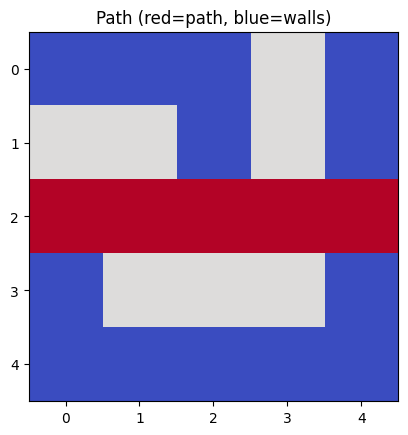

In [6]:
path, cost = astar(maze, start, goal, manhattan)
print("Case 1 Path:", path)
print("Case 1 Cost:", cost)
show_path(path)

## Case 2 – 1.5 × Manhattan Distance (Inadmissible)

Multiplying by 1.5 may overestimate the true cost → inadmissible.  
A* might return a **non-optimal** path under this heuristic.

Case 2 Path: [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]
Case 2 Cost: 4


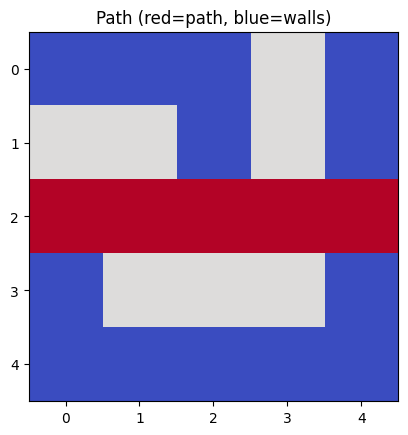

In [7]:
path, cost = astar(maze, start, goal, manhattan_1_5)
print("Case 2 Path:", path)
print("Case 2 Cost:", cost)
show_path(path)

## Case 3 – Inconsistent Heuristic

This heuristic breaks the triangle inequality for one neighbor.  
A* may still find the optimal path but could **reopen** nodes or expand inefficiently.

Case 3 Path: [(2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4)]
Case 3 Cost: 8


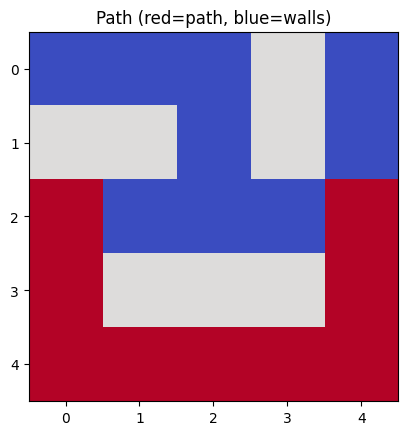

In [8]:
path, cost = astar(maze, start, goal, inconsistent)
print("Case 3 Path:", path)
print("Case 3 Cost:", cost)
show_path(path)